In [91]:
import time
import datetime
import pandas as pd

ticker = 'NVDA'
period1 = int(time.mktime(datetime.datetime(2007, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2023, 3, 20, 23, 59).timetuple()))
interval = '1d' # 1d, 1m, 1wk

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
# print(df)
df.to_csv('NVDA.csv')

In [92]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,6.178333,6.253333,5.798333,6.013333,5.517812,115482000
1,2007-01-04,5.991667,6.013333,5.838333,5.985000,5.491814,79729800
2,2007-01-05,5.843333,5.866667,5.570000,5.610000,5.147716,124334400
3,2007-01-08,5.630000,5.760000,5.533333,5.651667,5.185949,65727000
4,2007-01-09,5.660000,5.698333,5.535000,5.541667,5.085013,76416600


In [93]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4076,2023-03-14,234.960007,242.190002,234.600006,240.630005,240.630005,47491000
4077,2023-03-15,237.610001,242.860001,233.600006,242.279999,242.279999,52448600
4078,2023-03-16,240.270004,255.880005,238.940002,255.410004,255.410004,58325300
4079,2023-03-17,259.820007,263.989990,256.679993,257.250000,257.250000,84694400
4080,2023-03-20,256.149994,260.239990,251.300003,259.000000,259.000000,43274700


In [94]:
# Copying data to another variable to avoid any changes to original data
data=df.copy()

In [95]:
data = data[['Date','Close']]
data

,Date,Close
0,2007-01-03,6.013333
1,2007-01-04,5.985000
2,2007-01-05,5.610000
3,2007-01-08,5.651667
4,2007-01-09,5.541667
...,...,...
4076,2023-03-14,240.630005
4077,2023-03-15,242.279999
4078,2023-03-16,255.410004
4079,2023-03-17,257.250000


In [96]:
data['Date']

0       2007-01-03
1       2007-01-04
2       2007-01-05
3       2007-01-08
4       2007-01-09
           ...    
4076    2023-03-14
4077    2023-03-15
4078    2023-03-16
4079    2023-03-17
4080    2023-03-20
Name: Date, Length: 4081, dtype: object

In [97]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]),int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2007-01-01')
datetime_object

datetime.datetime(2007,1,1,0,0)

datetime.datetime(2007, 1, 1, 0, 0)

In [98]:
data

,Date,Close
0,2007-01-03,6.013333
1,2007-01-04,5.985000
2,2007-01-05,5.610000
3,2007-01-08,5.651667
4,2007-01-09,5.541667
...,...,...
4076,2023-03-14,240.630005
4077,2023-03-15,242.279999
4078,2023-03-16,255.410004
4079,2023-03-17,257.250000


In [99]:
data['Date'] = data['Date'].apply(str_to_datetime)
data['Date']

0      2007-01-03
1      2007-01-04
2      2007-01-05
3      2007-01-08
4      2007-01-09
          ...    
4076   2023-03-14
4077   2023-03-15
4078   2023-03-16
4079   2023-03-17
4080   2023-03-20
Name: Date, Length: 4081, dtype: datetime64[ns]

In [100]:
data.index = data.pop('Date')
data

,Close
Date,
2007-01-03,6.013333
2007-01-04,5.985000
2007-01-05,5.610000
2007-01-08,5.651667
2007-01-09,5.541667
...,...
2023-03-14,240.630005
2023-03-15,242.279999
2023-03-16,255.410004


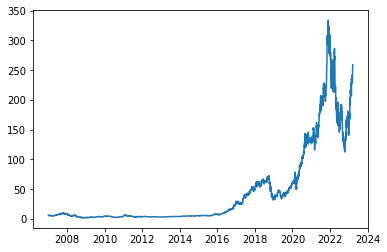

In [101]:
import matplotlib.pyplot as plt
plt.plot(data.index, data['Close'])

In [102]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2019-01-01'
windowed_df = df_to_windowed_df(data, 
                                '2019-01-01', 
                                '2023-03-20', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2019-01-01,33.275002,32.792500,33.412498,33.375000
1,2019-01-03,33.412498,33.375000,34.055000,31.997499
2,2019-01-04,33.375000,34.055000,31.997499,34.047501
3,2019-01-07,34.055000,31.997499,34.047501,35.849998
4,2019-01-08,31.997499,34.047501,35.849998,34.957500
...,...,...,...,...,...
1056,2023-03-14,234.360001,229.649994,229.660004,240.630005
1057,2023-03-15,229.649994,229.660004,240.630005,242.279999
1058,2023-03-16,229.660004,240.630005,242.279999,255.410004
1059,2023-03-17,240.630005,242.279999,255.410004,257.250000


In [103]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1061,), (1061, 3, 1), (1061,))

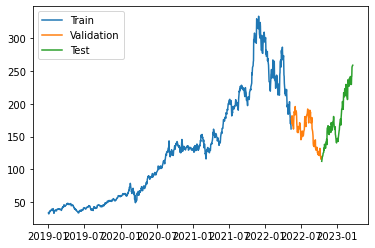

In [104]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
27/27 [==============================] - 4s 31ms/step - loss: 22023.0645 - mean_absolute_error: 125.0831 - val_loss: 25366.4355 - val_mean_absolute_error: 157.7010
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 21511.3828 - mean_absolute_error: 122.9262 - val_loss: 24318.3652 - val_mean_absolute_error: 154.3319
Epoch 3/100
27/27 [==============================] - 0s 7ms/step - loss: 19788.7598 - mean_absolute_error: 114.7923 - val_loss: 20237.8594 - val_mean_absolute_error: 140.4049
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 14394.1895 - mean_absolute_error: 89.7412 - val_loss: 10045.4209 - val_mean_absolute_error: 97.6861
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 8215.4648 - mean_absolute_error: 69.9746 - val_loss: 2937.1770 - val_mean_absolute_error: 49.4078
Epoch 6/100
27/27 [==============================] - 0s 7ms/step - loss: 6003.5962 - mean_absolute_error: 63.9369 - val_loss: 1348

27/27 [==============================] - 1s 3ms/step


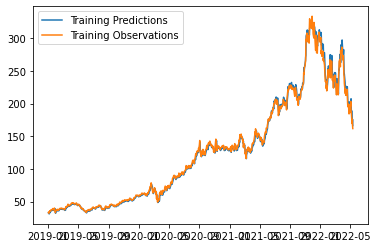

In [106]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 [==============================] - 0s 4ms/step


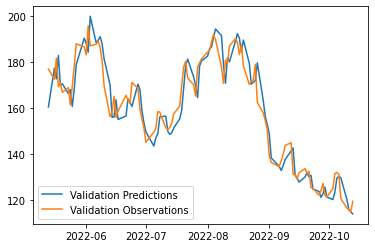

In [107]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 4ms/step


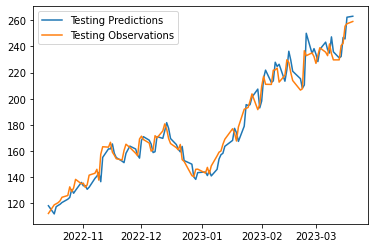

In [108]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

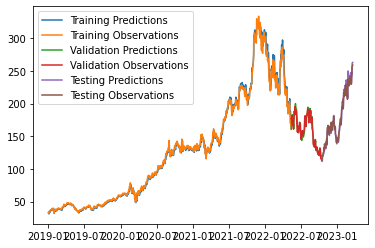

In [109]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [110]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 26ms/step


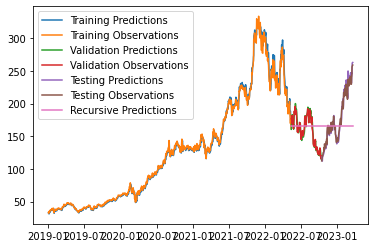

In [111]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])